In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [264]:
df=pd.read_csv("C:/Users/athul/Downloads/Titanic-Dataset.csv")

In [265]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [177]:
df.shape

(891, 12)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [266]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [267]:
df=df.drop("Cabin",axis=1)

In [268]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [269]:
df.duplicated().sum()

0

In [270]:
df["Age"].mean()

29.69911764705882

In [271]:
df["Age"].min()

0.42

In [272]:
df['Age'].max()

80.0

In [273]:
df['Age']=df['Age'].fillna(df["Age"].mean())

In [274]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,Q


In [275]:
df['Age'].isnull().sum()

0

In [276]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [277]:
df.dropna(inplace=True)

In [278]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [192]:
survival_count=df['Survived'].value_counts().reset_index()

In [193]:
survival_count

,Survived,count
0,0,549
1,1,340


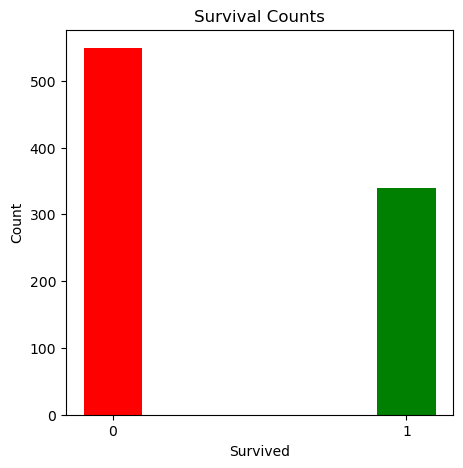

In [194]:
plt.figure(figsize=(5,5))
plt.bar(survival_count['Survived'],survival_count['count'],color=['r','g'],width=0.2)
plt.xticks(survival_count['Survived'])
plt.title('Survival Counts')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [195]:
df1=df.groupby("Sex")["Survived"].value_counts().reset_index()

In [196]:
df1

,Sex,Survived,count
0,female,1,231
1,female,0,81
2,male,0,468
3,male,1,109


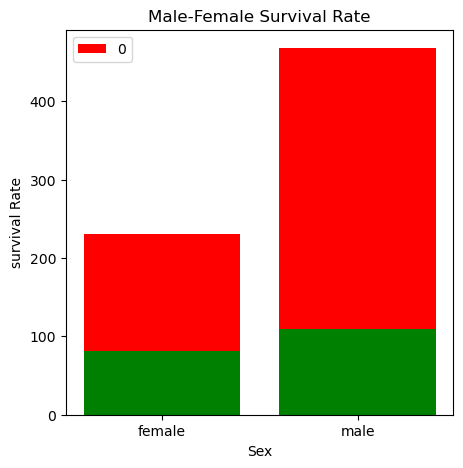

In [197]:
plt.figure(figsize=(5,5))
plt.bar(df1['Sex'],df1['count'],color=['r','g'])
plt.title('Male-Female Survival Rate')
plt.xlabel('Sex')
plt.ylabel('survival Rate')
plt.legend([0,1])

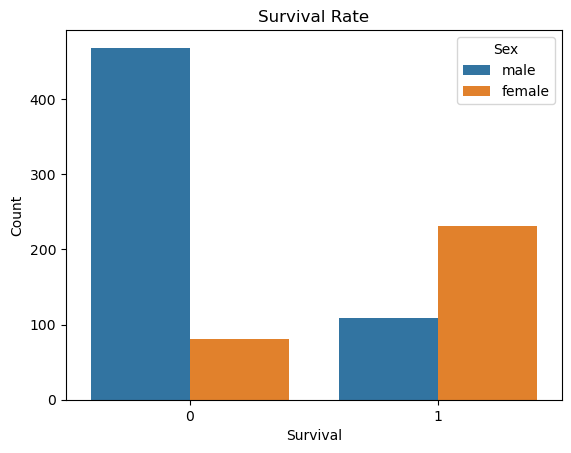

In [198]:
sns.countplot(x='Survived',hue='Sex',data=df)
plt.title("Survival Rate")
plt.xlabel('Survival')
plt.ylabel('Count')
plt.show()

In [199]:
df2=df[(df['Age']<18) & (df['Sex']=='female')]
minorFemale=df2['Name'].tolist()

In [200]:
minorFemale

['Nasser, Mrs. Nicholas (Adele Achem)',
 'Sandstrom, Miss. Marguerite Rut',
 'Vestrom, Miss. Hulda Amanda Adolfina',
 'McGowan, Miss. Anna "Annie"',
 'Palsson, Miss. Torborg Danira',
 'Nicola-Yarred, Miss. Jamila',
 'Laroche, Miss. Simonne Marie Anne Andree',
 'West, Miss. Constance Mirium',
 'Andersson, Miss. Erna Alexandra',
 'Goodwin, Miss. Lillian Amy',
 'Ilett, Miss. Bertha',
 'Zabour, Miss. Hileni',
 'Attalah, Miss. Malake',
 'Andersson, Miss. Ellis Anna Maria',
 'Ford, Miss. Robina Maggie "Ruby"',
 'Gilnagh, Miss. Katherine "Katie"',
 'Johnson, Miss. Eleanor Ileen',
 'Kink-Heilmann, Miss. Luise Gretchen',
 'Strom, Miss. Telma Matilda',
 'Carr, Miss. Helen "Ellen"',
 'Asplund, Miss. Lillian Gertrud',
 'Collyer, Miss. Marjorie "Lottie"',
 'Allison, Miss. Helen Loraine',
 'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)',
 'Hippach, Miss. Jean Gertrude',
 'Palsson, Miss. Stina Viola',
 'Nakid, Miss. Maria ("Mary")',
 'Lehmann, Miss. Bertha',
 'Van

In [201]:
num=[]
for i in df.columns:
    if df[i].dtype=='float64' or df[i].dtype=='int64':
        num.append(i)

In [202]:
num = num[1:]

In [203]:
num

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [204]:
df3=df[num]

In [205]:
df4=df3.groupby('Pclass').agg({'Age': 'mean','SibSp': 'mean', 'Parch': 'mean', 'Fare': 'mean','Survived':'mean'})

In [206]:
df4

,Age,SibSp,Parch,Fare,Survived
Pclass,,,,,
1,36.927073,0.420561,0.359813,84.193516,0.626168
2,29.866958,0.402174,0.380435,20.662183,0.472826
3,26.403259,0.615071,0.393075,13.675550,0.242363


In [207]:
df5=df.groupby(['Pclass','Sex']).agg({'Age':'mean'})

In [208]:
df5

Age
Pclass Sex              
1      female  33.796653
       male    39.287717
2      female  28.748661
       male    30.653908
3      female  24.068493
       male    27.372153

In [209]:
df6=df.groupby('Embarked').agg({'Fare':'mean'})

In [210]:
df6

,Fare
Embarked,
C,59.954144
Q,13.276030
S,27.079812


In [211]:
df7=df.groupby('SibSp').agg({'Age':'mean'})

In [212]:
df7

,Age
SibSp,
0,30.952193
1,30.041134
2,23.378477
3,17.862279
4,7.055556
5,10.200000
8,29.699118


In [213]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [214]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [215]:
df=df.drop('Name',axis=1)

In [216]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.000000,1,0,113803,53.1000,S
4,5,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,S
887,888,1,1,female,19.000000,0,0,112053,30.0000,S
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.000000,0,0,111369,30.0000,C


In [217]:
df=df.drop('PassengerId',axis=1)

In [218]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.000000,1,0,113803,53.1000,S
4,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,S
887,1,1,female,19.000000,0,0,112053,30.0000,S
888,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.000000,0,0,111369,30.0000,C


In [219]:
df=df.drop('Ticket',axis=1)

In [220]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [279]:
le=LabelEncoder()

In [280]:
df['Sex']=le.fit_transform(df['Sex'])

In [281]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [282]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [283]:
X=df.drop('Survived',axis=1)

In [236]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,-0.590495,1,0,-0.500240,2
1,1,0,0.643971,1,0,0.788947,0
2,3,0,-0.281878,0,0,-0.486650,2
3,1,0,0.412509,1,0,0.422861,2
4,3,1,0.412509,0,0,-0.484133,2
...,...,...,...,...,...,...,...
886,2,1,-0.204724,0,0,-0.384475,2
887,1,0,-0.821957,0,0,-0.042213,2
888,3,0,0.003524,1,2,-0.174084,2
889,1,1,-0.281878,0,0,-0.042213,0


In [237]:
Y=df['Survived']

In [238]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [239]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=43)

In [240]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
597,3,1,1.492666,0,0,-0.646204,2
506,2,0,0.258200,0,2,-0.122745,2
103,3,1,0.258200,0,0,-0.471969,2
298,1,1,0.003524,0,0,-0.032146,2
231,3,1,-0.050416,0,0,-0.489670,2
...,...,...,...,...,...,...,...
278,3,1,-1.747807,4,1,-0.059829,1
818,3,1,1.029742,0,0,-0.516346,2
256,1,0,0.003524,0,0,0.948334,0
321,3,1,-0.204724,0,0,-0.487238,2


In [241]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
333,3,1,-1.053420,2,0,-0.283809,2
546,2,0,-0.821957,1,0,-0.122745,2
533,3,0,0.003524,0,2,-0.196063,0
449,1,1,1.724129,0,0,-0.032146,2
677,3,0,-0.899111,0,0,-0.448061,2
...,...,...,...,...,...,...,...
443,2,0,-0.127570,0,0,-0.384475,2
432,2,0,0.952587,1,0,-0.122745,2
461,3,1,0.335355,0,0,-0.484133,2
761,3,1,0.875433,0,0,-0.502756,2


In [242]:
lr=LogisticRegression()

In [243]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [244]:
Y_pred=lr.predict(X_test)

In [245]:
Y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0], dtype=int64)

In [64]:
Y_pred-Y_test

333    0
546    0
533    0
449   -1
677    0
      ..
443    0
432    0
461    0
761    0
0      0
Name: Survived, Length: 267, dtype: int64

In [249]:
((Y_pred-Y_test).value_counts()[0]/len(Y_pred))*100

83.52059925093633

In [250]:
lr.score(X_test,Y_test)

0.8352059925093633

In [69]:
se=StandardScaler()

In [246]:
accuracy_score(Y_test,Y_pred)

0.8352059925093633

In [82]:
dt=DecisionTreeClassifier()

In [83]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [84]:
Y_pred=dt.predict(X_test)

In [85]:
Y_pred

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1], dtype=int64)

In [248]:
accuracy_score(Y_test,Y_pred)

0.8352059925093633

In [87]:
rf=RandomForestClassifier()

In [88]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [89]:
Y_pred=rf.predict(X_test)

In [90]:
Y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [91]:
accuracy_score(Y_test,Y_pred)

0.8014981273408239

In [229]:
sc=StandardScaler()

In [230]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [173]:
df['Age']=sc.fit_transform(df['Age'].values.reshape(-1,1))

In [108]:
df['Age']

0     -0.590495
1      0.643971
2     -0.281878
3      0.412509
4      0.412509
         ...   
886   -0.204724
887   -0.821957
888    0.003524
889   -0.281878
890    0.181046
Name: Age, Length: 889, dtype: float64

In [231]:
df[["Age","Fare"]]=sc.fit_transform(df[["Age","Fare"]])

In [232]:
df[["Age","Fare"]]

,Age,Fare
0,-0.590495,-0.500240
1,0.643971,0.788947
2,-0.281878,-0.486650
3,0.412509,0.422861
4,0.412509,-0.484133
...,...,...
886,-0.204724,-0.384475
887,-0.821957,-0.042213
888,0.003524,-0.174084
889,-0.281878,-0.042213


In [254]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


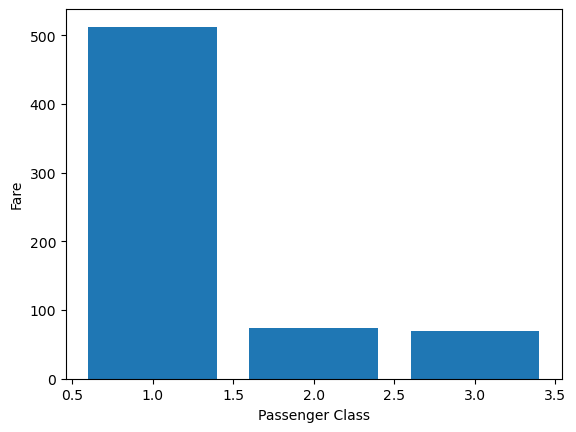

In [262]:
x=df['Pclass']
y=df['Fare']
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.bar(x,y)
plt.show()